In [64]:
import quandl
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

%matplotlib inline


In [122]:
MORTG = quandl.get("FMAC/MORTG", trim_start = "2000-01-01", trim_end = "2018-03-01", authtoken=auth_tok)
UNRATE = quandl.get("FRED/UNRATE", trim_start = "2000-01-01", trim_end = "2018-03-01", authtoken=auth_tok)
#USA_NGDP_RPCH = quandl.get("ODA/USA_NGDP_RPCH", trim_start = "2010-01-01", trim_end = "2018-03-01", authtoken=auth_tok)
CPI_USA = quandl.get("RATEINF/CPI_USA", trim_start = "2000-12-12", trim_end = "2018-03-01", authtoken=auth_tok)
HPI = quandl.get("FMAC/HPI", trim_start = "2000-12-12", trim_end = "2018-03-01", authtoken=auth_tok)

In [123]:
data_frames = [MORTG, UNRATE, CPI_USA]


In [124]:



data_frames[0]=data_frames[0].pct_change()
data_frames[1]=data_frames[1].pct_change()



df2 = pd.merge(data_frames[0], data_frames[1], left_index=True, right_index=True)
#df3 =  pd.merge(df2, data_frames[2], left_index=True, right_index=True)
#MORTG.join(UNRATE)
df2['month'] = pd.DatetimeIndex(df2.index).month
df2['year'] = pd.DatetimeIndex(df2.index).year
df2['month'] = pd.DatetimeIndex(df2.index).month # +1 
df2['year'] = pd.DatetimeIndex(df2.index).year
df2.head()

,Value_x,Value_y,month,year
Date,,,,
2000-01-01,NaN,NaN,1,2000
2000-02-01,0.014616,0.025000,2,2000
2000-03-01,-0.010804,-0.024390,3,2000
2000-04-01,-0.010922,-0.050000,4,2000
2000-05-01,0.045399,0.052632,5,2000


In [125]:
#CPI_USA
df7 = CPI_USA
df7= df7.pct_change()
df7['month'] = pd.DatetimeIndex(df7.index).month # +1 
df7['year'] = pd.DatetimeIndex(df7.index).year
df8 = pd.merge(df2, df7, left_on=['month', 'year'],right_on=['month', 'year'])
df8.rename(columns={'Value_x':'mortgrate', 'Value_y':'unemp','Value': 'cpi' }, inplace=True)

#df8.to_pickle('mortunempcpi.p')


In [126]:
df8.head()

,mortgrate,unemp,month,year,cpi
0,-0.047742,0.000000,12,2000,NaN
1,-0.047425,0.076923,1,2001,0.006322
2,0.002845,0.000000,2,2001,0.003998
3,-0.014184,0.023810,3,2001,0.002275
4,0.018705,0.023256,4,2001,0.003973


In [127]:
HPIUS = pd.DataFrame (HPI['United States seasonaly adjusted'].pct_change())

# That is by state
HPIUS.head()
HPIUS['month'] = pd.DatetimeIndex(HPIUS.index).month # +1 
HPIUS['year'] = pd.DatetimeIndex(HPIUS.index).year
df9 = pd.merge(HPIUS, df8, left_on=['month', 'year'],right_on=['month', 'year'])
df9 = df9.dropna()
df9.rename(columns={'United States seasonaly adjusted':'HPIUS'}, inplace=True)
df9.head()



,HPIUS,month,year,mortgrate,unemp,cpi
1,0.006723,1,2001,-0.047425,0.076923,0.006322
2,0.006981,2,2001,0.002845,0.000000,0.003998
3,0.006864,3,2001,-0.014184,0.023810,0.002275
4,0.005696,4,2001,0.018705,0.023256,0.003973
5,0.005205,5,2001,0.009887,-0.022727,0.004522


In [128]:
df9['Date'] = df9['month'].astype(str) + ' ' +df9['year'].astype(str)
df9['Date']=  pd.to_datetime(df9['Date'], format='%m %Y')
df9.set_index('Date', inplace=True)
df9.to_pickle('mortunempcpihpi.p')


Index(['HPIUS', 'month', 'year', 'mortgrate', 'unemp', 'cpi'], dtype='object')

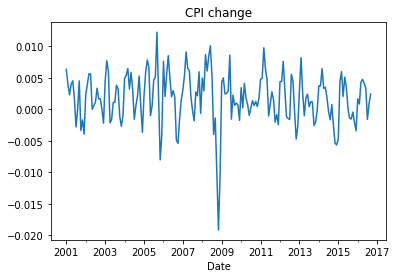

In [135]:
df9.cpi.plot(title = 'CPI change')
df9.columns

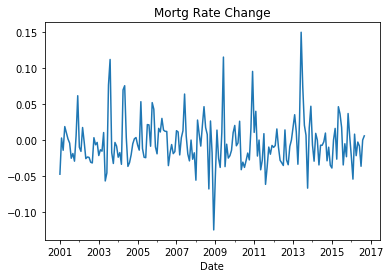

In [147]:
df9.mortgrate.plot(title = 'Mortg Rate Change')

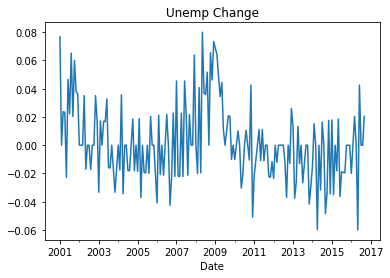

In [139]:
df9.unemp.plot(title = 'Unemp Change')


In [140]:
df9.dropna(inplace=True)

df9 = df9.replace([np.inf, -np.inf], np.nan)
df9.dropna(inplace=True)
df9.head()



,HPIUS,month,year,mortgrate,unemp,cpi
Date,,,,,,
2001-01-01,0.006723,1,2001,-0.047425,0.076923,0.006322
2001-02-01,0.006981,2,2001,0.002845,0.000000,0.003998
2001-03-01,0.006864,3,2001,-0.014184,0.023810,0.002275
2001-04-01,0.005696,4,2001,0.018705,0.023256,0.003973
2001-05-01,0.005205,5,2001,0.009887,-0.022727,0.004522


In [141]:
df9 = df9.loc[df9['unemp'] != -1]
df9

,HPIUS,month,year,mortgrate,unemp,cpi
Date,,,,,,
2001-01-01,0.006723,1,2001,-0.047425,0.076923,0.006322
2001-02-01,0.006981,2,2001,0.002845,0.000000,0.003998
2001-03-01,0.006864,3,2001,-0.014184,0.023810,0.002275
2001-04-01,0.005696,4,2001,0.018705,0.023256,0.003973
2001-05-01,0.005205,5,2001,0.009887,-0.022727,0.004522
2001-06-01,0.005134,6,2001,0.001399,0.046512,0.001688
2001-07-01,0.005546,7,2001,-0.004190,0.022222,-0.002809
2001-08-01,0.005405,8,2001,-0.025245,0.065217,0.000000
2001-09-01,0.005611,9,2001,-0.018705,0.020408,0.004507


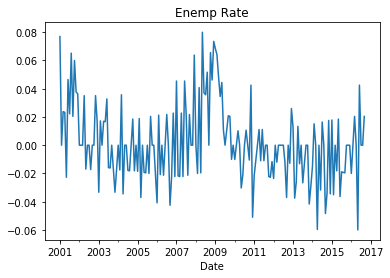

In [146]:
df9.unemp.plot(title = 'Enemp Rate')
#df9.columns

In [158]:
import statsmodels.api as sm
X = df9[[ 'mortgrate', 'unemp', 'cpi']]
y = df9['HPIUS']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HPIUS   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     7.756
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           6.60e-05
Time:                        16:32:38   Log-Likelihood:                 700.69
No. Observations:                 189   AIC:                            -1393.
Df Residuals:                     185   BIC:                            -1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.000      5.796      0.000       0.002       0.004
mortgrate      0.0229      0.013      1.712      0.089      -0.004       0.049
unemp         -0.0681      0.016     -4.150      0.000      -0.100      -0.036
cpi            0.0424      0.112      0.379      0.705      -0.178       0.263
==============================================================================
Omnibus:                       14.644   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.212
Skew:                          -0.614   Prob(JB):                     0.000820
Kurtosis:                       2.457   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

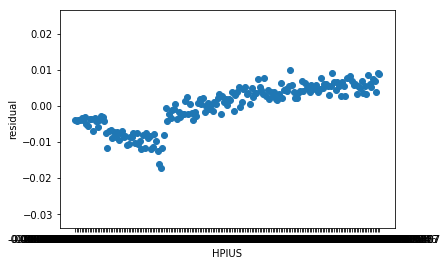

In [160]:
Y_pred = est.predict(X)
residual = df9["HPIUS"].values-Y_pred


plt.scatter(df9[["HPIUS"]],residual)
plt.xlabel("HPIUS") #X1 - a predictor")
plt.ylabel("residual")
plt.show()

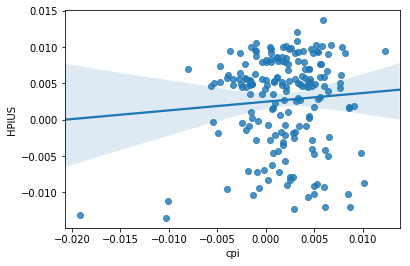

In [166]:
#sns.regplot(x="mortgrate", y="HPIUS", data=df9);
#sns.regplot(x="unemp", y="HPIUS", data=df9);
sns.regplot(x="cpi", y="HPIUS", data=df9);


In [ ]:
#'unemp', 'cpi'

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


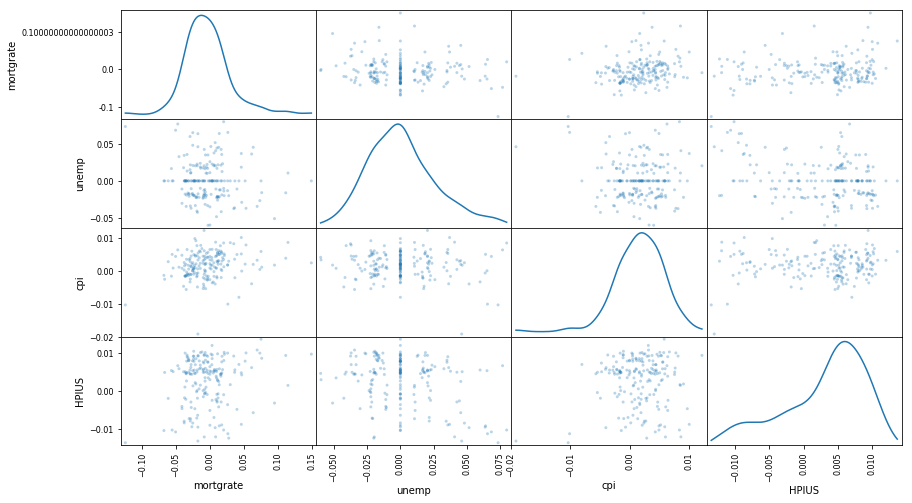

In [148]:
pd.scatter_matrix(df9[[ 'mortgrate', 'unemp', 'cpi', 'HPIUS']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');


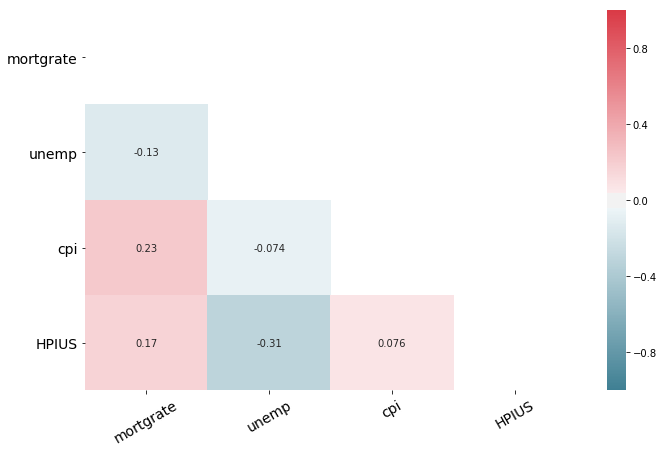

In [149]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = df9[[ 'mortgrate', 'unemp', 'cpi', 'HPIUS']].copy()
df_with_target['HPIUS'] = y
correlation_heat_map(df_with_target)

In [145]:
popdata  = pd.read_pickle("mergeddfclean.p")

In [58]:
popdata.head()

,county,RDEATH2016,Year,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price
0,Autauga AL,9.218433,2011-01-01,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568
1,Baldwin AL,9.868812,2011-01-01,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731
2,Barbour AL,11.632586,2011-01-01,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495
4,Blount AL,9.871136,2011-01-01,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218
7,Chambers AL,12.950211,2011-01-01,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399


In [245]:
df10 = pd.merge(popdata, df9, left_on='Year',right_on='Date', right_index = True).dropna()


In [246]:
df10.set_index('Year', inplace=True)


In [247]:
df10.to_pickle('df10popmacro.p')


In [248]:
df10

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,month,year,mortgrate,unemp,cpi
Year,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,1,2011,0.010616,-0.021505,0.004763


In [249]:

q = df10["price"].quantile(0.95)
df10 = df10[df10["price"] < q]

q = df10["price"].quantile(0.05)
popdf  = df10[df10["price"] > q]

#df11 = pd.DataFrame(df10.groupby(['county', 'year'])['price'].sum())
df11 = pd.DataFrame(df10.groupby(['county'])['price'].sum())

df11.sort_values(by=['price'], ascending=False)


#df.sort(['Peak', 'Weeks'], ascending=[True, False], inplace=True)


,price
county,
Collin TX,0.361569
Fort Bend TX,0.349979
Midland TX,0.340952
Carbon WY,0.338349
Arapahoe CO,0.337664
Denton TX,0.336251
Williamson TX,0.335679
Brevard FL,0.329373
Waller TX,0.328905


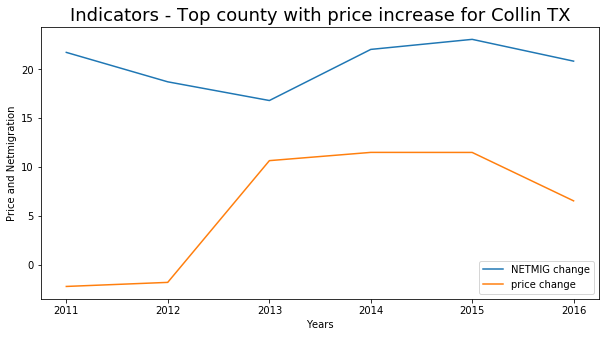

In [272]:
#df10[df10.county == 'Osceola FL'].price.plot()

df11 = df10.copy()
#print (df11)
#df11['price'] = df11['Price']*100
df11['price'] = df11['price'].apply(lambda x: x*100)

#df11[df11.county == 'Fort Bend TX'].price.plot()
#df11[df11.county == 'Fort Bend TX'].RNETMIG2016.plot()

county = 'Collin TX'	#'Fort Bend TX'

fig = plt.figure (figsize = (10,5))
ax = fig.add_subplot(111)

line = plt.plot(df11[df11.county == county].RNETMIG2016, ls='solid', label='NETMIG change')
line = plt.plot(df11[df11.county == county].price, ls='solid', label='price change')

plt.title('Indicators - Top county with price increase for '+ county, fontsize=18)

plt.xlabel('Years')
plt.ylabel('Price and Netmigration')

ax.legend(loc='best')
plt.show()



In [253]:
df10.columns

Index(['county', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price',
       'HPIUS', 'month', 'year', 'mortgrate', 'unemp', 'cpi'],
      dtype='object')

In [300]:
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [355]:
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

#data = load_boston()
#data = fetch_california_housing()

dataX = df10[['HPIUS', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016','RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'mortgrate', 'unemp', 'cpi']].values
dataY = df10[['price']].values

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY)

# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [356]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')
n_hidden = 1000
hidden1 = tf.layers.dense(X, units=n_hidden,
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, units=1,
                        name='y_hat',
                        activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.001)

training_op = optimizer.minimize(loss)

In [357]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(1000):
        sess.run(training_op, 
                 feed_dict={X:X_train, y:y_train})
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 100 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 0.6672113 0.66703963
epoch 101 -0.1582053 -0.1298745
epoch 201 -0.19531706 -0.16603418
epoch 301 -0.20083444 -0.1721376
epoch 401 -0.2033002 -0.17508562
epoch 501 -0.20450991 -0.17657892
epoch 601 -0.20522702 -0.1774163
epoch 701 -0.20573685 -0.17795487
epoch 801 -0.20614538 -0.17837077
epoch 901 -0.20648302 -0.17872491


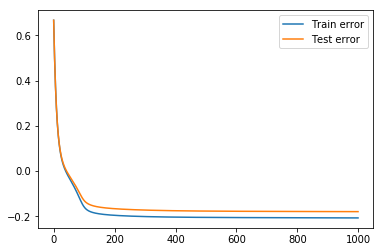

In [358]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [359]:
metrics.r2_score(y_test, pred)

0.08915400337110035

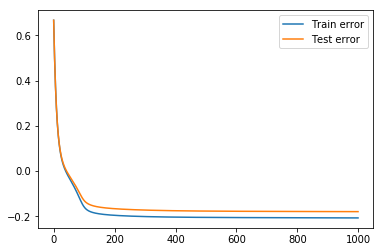

In [360]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [361]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train.shape

(6915, 10)

In [362]:
from keras.models import Sequential
from keras.layers import Dense

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [364]:
model = Sequential()

input_units = X_train.shape[1]
hidden_units = input_units

model.add(Dense(hidden_units, input_dim=input_units, activation='relu'))
model.add(Dense(1))

In [365]:
from keras.optimizers import Adam

#model.compile(loss='mean_squared_error', optimizer='adam')

adam = Adam(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)

In [366]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=None)

Train on 6915 samples, validate on 2305 samples
Epoch 1/10
6915/6915 [==============================] - 1s 99us/step - loss: 0.0208 - val_loss: 0.0047
Epoch 2/10
6915/6915 [==============================] - 0s 28us/step - loss: 0.0046 - val_loss: 0.0042
Epoch 3/10
6915/6915 [==============================] - 0s 30us/step - loss: 0.0043 - val_loss: 0.0037
Epoch 4/10
6915/6915 [==============================] - 0s 39us/step - loss: 0.0043 - val_loss: 0.0038
Epoch 5/10
6915/6915 [==============================] - 0s 29us/step - loss: 0.0041 - val_loss: 0.0036
Epoch 6/10
6915/6915 [==============================] - 0s 28us/step - loss: 0.0040 - val_loss: 0.0037
Epoch 7/10
6915/6915 [==============================] - 0s 32us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 8/10
6915/6915 [==============================] - 0s 28us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 9/10
6915/6915 [==============================] - 0s 25us/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
6915/6915 [==

In [372]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=None, verbose=0)

In [373]:
#plt.plot(history.history['acc'])
history

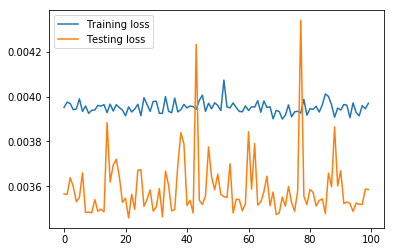

In [374]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

In [377]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.003952,0.003567
1,0.003975,0.003563
2,0.003969,0.003638
3,0.003942,0.003598
4,0.003945,0.003531
5,0.003990,0.003551
6,0.003934,0.003659
7,0.003959,0.003483
8,0.003926,0.003485
9,0.003939,0.003481
